# Unit 5 - Financial Planning


In [107]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [25]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 12


True

## Part 1 - Personal Finance Planner

In [26]:
# Set monthly household income
monthly_income = 12000
# YOUR CODE HERE!

### Collect Crypto Prices Using the `requests` Library

In [27]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [32]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
print(json.dumps(btc_price, indent =4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18573156,
            "total_supply": 18573156,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 22068.0,
                    "volume_24h": 45555786351,
                    "market_cap": 409872779515,
                    "percentage_change_1h": 1.24170996562005,
                    "percentage_change_24h": 13.9787553012104,
                    "percentage_change_7d": 18.8712104632066,
                    "percent_change_1h": 1.24170996562005,
                    "percent_change_24h": 13.9787553012104,
                    "percent_change_7d": 18.8712104632066
                }
            },
            "last_updated": 1608184394
        }
    },
    "metadata": {
        "timestamp": 1608184394,
        "num_cryptocur

In [52]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
btc_price= btc_price.json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]
# YOUR CODE HERE!

 #Fetch current ETH price

eth_price = requests.get(eth_url)
eth_price= eth_price.json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = (my_btc) * (btc_price)
my_eth_value = (my_eth) * (eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26536.80
The current value of your 5.3 ETH is $3419.03


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [54]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [55]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

print(f"alpaca_key_type:{type(alpaca_api_key)}")
print(f"alpaca_secret_type:{type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,
                      alpaca_secret_key,
                      api_version="v2")
# YOUR CODE HERE!

alpaca_key_type:<class 'str'>
alpaca_secret_type:<class 'str'>


In [88]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-12-16", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
hw_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
hw_portfolio
# Pick AGG and SPY close prices
agg_close_price = float(hw_portfolio ["AGG"]["close"])
spy_close_price = float(hw_portfolio ["SPY"]["close"])



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.97
Current SPY closing price: $370.14


In [91]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# YOUR CODE HERE!

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18507.00
The current value of your 200 AGG shares is $23594.00


### Savings Health Analysis

In [113]:
# Create savings DataFrame
# YOUR CODE HERE!
savings_data = {"amount":[my_btc_value + my_eth_value, my_spy_value + my_agg_value]}
assets = ["crypto", "shares"]
df_savings = pd.DataFrame(savings_data, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,29955.83
shares,42101.00


<AxesSubplot:title={'center':'Composition of Peronsal Savings'}, ylabel='amount'>

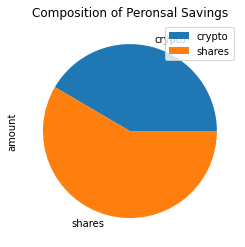

In [116]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Composition of Peronsal Savings")
# YOUR CODE HERE!

In [139]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = (df_savings ["amount"][0])+(df_savings["amount"][1])
# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund")
else:
    print ("Sorry, you need to save more")
# YOUR CODE HERE!

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [140]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [163]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
start_date = pd.Timestamp("2015-12-17", tz="America/Chicago").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/Chicago").isoformat()

hw_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
hw_portfolio
df_stock_data = pd.DataFrame()
df_stock_data["SPY"]=hw_portfolio["SPY"]["close"]
df_stock_data["AGG"]=hw_portfolio["AGG"]["close"]
df_stock_data.index=df_stock_data.index.date

# Display sample data
df_stock_data.head()

,SPY,AGG
2015-12-17,204.89,108.15
2015-12-18,199.96,108.40
2015-12-21,201.65,108.29
2015-12-22,203.51,108.19
2015-12-23,206.02,108.18


In [198]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(portfolio_data=hw_portfolio, weights = [0.5,0.5], num_simulation = 500, num_trading_days=252*30)
# YOUR CODE HERE!

In [199]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.tail()
# YOUR CODE HERE!

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2020-04-27 00:00:00-04:00  117.21  117.3600  116.8200  116.84   6707494.0   
2020-04-28 00:00:00-04:00  117.27  117.4500  117.1200  117.25  10729690.0   
2020-04-29 00:00:00-04:00  117.29  117.4800  117.2000  117.43   9036494.0   
2020-04-30 00:00:00-04:00  117.38  117.4900  117.0650  117.15  13756340.0   
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.90  11778582.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-04-27 00:00:00-04:00    -0.004346  285.12  288.2700  284.62  287.11   
2020-04-28 00:00:00-04:00     0.003509  291.02  291.4000  285.40  285.77   
2020-04-29 00:00:00-04:00     0.001535  291.53  294.8800  290.41  293.19   
2020-04-30 00:00:00-04:00    -0.002384  291.71  293.3239  288.59  290.39   
2020-05-01 00:00:00-04:00    -0.002134  285.31  290.6572  281.52  282.73   

                                                   
                              volume daily_return  
time                                               
2020-04-27 00:00:00-04:00   67454166     0.014380  
2020-04-28 00:00:00-04:00   95561389    -0.004667  
2020-04-29 00:00:00-04:00  102013837     0.025965  
2020-04-30 00:00:00-04:00  101677550    -0.009550  
2020-05-01 00:00:00-04:00  111321036    -0.026378

In [200]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002872,0.999348,0.997377,1.007818,1.006068,0.995861,0.990297,1.003259,1.003808,0.992922,...,1.005529,1.006990,1.004412,1.009028,1.009000,0.989935,1.004236,0.993463,0.996248,0.998036
2,1.012383,0.996667,0.995648,1.017403,1.019268,0.986029,0.986421,1.003990,0.995774,0.978700,...,1.009744,1.007332,1.005329,1.004840,1.007795,0.993020,0.996396,1.001663,1.003520,1.000556
3,1.026685,0.991671,0.991831,1.019064,1.017350,0.977818,0.978718,0.997999,0.992923,0.979830,...,1.009785,1.006987,1.003917,1.007316,1.004168,0.999515,0.994962,0.999937,1.005039,0.992398
4,1.021655,0.995151,0.983193,1.020383,1.007863,0.989041,0.974809,0.993449,0.985198,0.980943,...,1.000347,0.996668,1.004116,1.003994,1.002333,0.995209,0.991602,0.997228,1.014671,1.000478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.970780,5.895971,9.989629,3.127040,1.997073,5.901962,3.489836,3.401497,3.323213,1.442677,...,3.795536,3.258598,5.046070,10.324010,23.234275,2.727889,3.917466,2.971355,2.765243,2.082476
7557,2.985691,5.911724,10.071255,3.138207,1.995924,5.858798,3.492032,3.406504,3.337520,1.450608,...,3.758690,3.276853,5.072424,10.346441,23.151238,2.718475,3.908583,2.975875,2.763961,2.057149
7558,2.993041,5.925030,10.092180,3.141720,2.003809,5.927954,3.517127,3.398180,3.333030,1.452973,...,3.781217,3.290352,5.047604,10.372543,23.362253,2.702870,3.906658,2.963964,2.770403,2.066955
7559,3.003076,5.931768,10.114692,3.159040,1.998522,5.925295,3.535962,3.399080,3.317280,1.445967,...,3.782691,3.282312,5.079444,10.469576,23.499516,2.690492,3.911251,2.948323,2.760686,2.054055


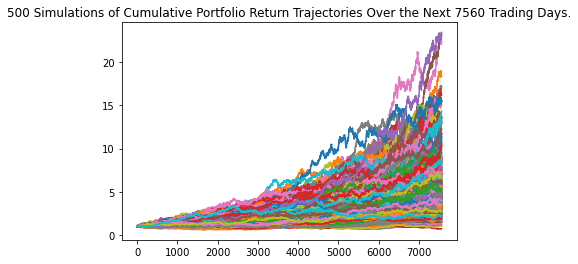

In [201]:
line_plot = MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig("500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days")

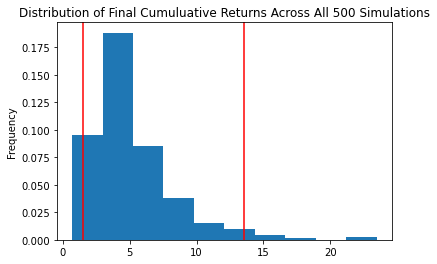

In [202]:
dist_plot = MC_thirtyyear.plot_distribution()
dist_plot.get_figure().savefig("MC_thirtyyear_dist_plot.png",bbox_inches="tight")

### Retirement Analysis

In [203]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl= MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              5.201074
std               3.169205
min               0.701118
25%               3.137784
50%               4.509744
75%               6.204457
max              23.454246
95% CI Lower      1.534042
95% CI Upper     13.552258
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [204]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower= round(tbl[8]* initial_investment, 2)
ci_upper= round(tbl[9]* initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $30680.84 and $271045.17


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [197]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower= round(tbl[8]* initial_investment, 2)
ci_upper= round(tbl[9]* initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24062.42 and $59714.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [207]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data=hw_portfolio, weights = [0.5,0.5], num_simulation = 500, num_trading_days=252*5)
MC_fiveyear.portfolio_data.tail()
# YOUR CODE HERE!

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2020-04-27 00:00:00-04:00  117.21  117.3600  116.8200  116.84   6707494.0   
2020-04-28 00:00:00-04:00  117.27  117.4500  117.1200  117.25  10729690.0   
2020-04-29 00:00:00-04:00  117.29  117.4800  117.2000  117.43   9036494.0   
2020-04-30 00:00:00-04:00  117.38  117.4900  117.0650  117.15  13756340.0   
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.90  11778582.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-04-27 00:00:00-04:00    -0.004346  285.12  288.2700  284.62  287.11   
2020-04-28 00:00:00-04:00     0.003509  291.02  291.4000  285.40  285.77   
2020-04-29 00:00:00-04:00     0.001535  291.53  294.8800  290.41  293.19   
2020-04-30 00:00:00-04:00    -0.002384  291.71  293.3239  288.59  290.39   
2020-05-01 00:00:00-04:00    -0.002134  285.31  290.6572  281.52  282.73   

                                                   
                              volume daily_return  
time                                               
2020-04-27 00:00:00-04:00   67454166     0.014380  
2020-04-28 00:00:00-04:00   95561389    -0.004667  
2020-04-29 00:00:00-04:00  102013837     0.025965  
2020-04-30 00:00:00-04:00  101677550    -0.009550  
2020-05-01 00:00:00-04:00  111321036    -0.026378

In [208]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997041,0.987610,0.998794,0.996708,1.001841,0.988516,0.987487,1.001126,0.995737,0.995060,...,1.003415,1.005064,0.990418,0.991498,0.990515,1.008636,1.001277,0.991686,0.996841,0.991521
2,0.989842,0.983924,0.993701,1.001572,0.996772,0.989765,0.991826,0.997894,0.986574,0.988403,...,0.996941,1.007983,0.997105,1.006259,1.000167,1.012252,0.998180,0.991714,1.001104,0.986685
3,0.984219,0.991802,0.983387,1.003391,0.995164,0.993122,0.995396,0.993448,0.991681,0.986248,...,0.997399,1.002180,0.993646,1.006495,0.995511,1.014188,0.990729,0.990786,1.001443,0.990696
4,0.976454,0.991067,0.978829,0.996788,0.989670,0.979985,0.979744,0.995166,0.998345,0.985845,...,1.000453,0.998418,0.991356,1.008412,0.988122,1.027021,0.994566,0.994998,0.990232,0.984071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.048176,1.337973,1.681236,0.915974,0.883715,1.418039,0.935799,1.755415,1.810075,0.858317,...,1.618944,0.930356,1.243511,1.344109,1.561575,1.506316,1.387320,1.056435,0.829550,1.281290
1257,1.054203,1.334550,1.692445,0.908554,0.882240,1.409381,0.936198,1.748397,1.816310,0.858291,...,1.610378,0.936290,1.250308,1.337536,1.563172,1.497922,1.389525,1.060459,0.827773,1.285001
1258,1.064194,1.346990,1.697663,0.902550,0.876057,1.409256,0.931402,1.749370,1.816596,0.856511,...,1.604175,0.928663,1.256351,1.338139,1.576657,1.500087,1.383745,1.060852,0.819256,1.271989
1259,1.054651,1.358439,1.693820,0.916646,0.871220,1.401089,0.923956,1.760088,1.803313,0.857788,...,1.600708,0.928890,1.256499,1.351336,1.580129,1.494400,1.386845,1.067148,0.812154,1.262152


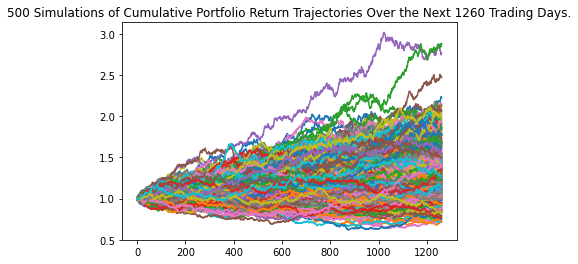

In [209]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()
line_plot.get_figure().savefig("500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days")
# YOUR CODE HERE!

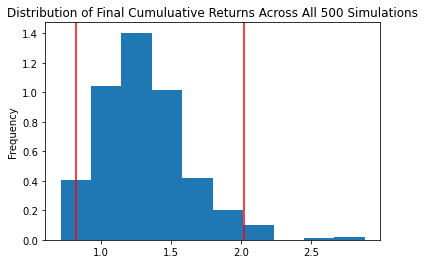

In [210]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()
dist_plot.get_figure().savefig("MC_thirtyyear_dist_plot.png",bbox_inches="tight")
# YOUR CODE HERE!

In [213]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five= MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.311455
std               0.311825
min               0.715027
25%               1.095159
50%               1.288309
75%               1.470422
max               2.880712
95% CI Lower      0.821661
95% CI Upper      2.022965
Name: 1260, dtype: float64


In [215]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five= round(tbl[8]* initial_investment, 2)
ci_upper_five= round(tbl[9]* initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49299.63 and $121377.92


### Ten Years Retirement Option

In [224]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(portfolio_data=hw_portfolio, weights = [0.5,0.5], num_simulation = 500, num_trading_days=252*10)
MC_tenyear.portfolio_data.tail()
# YOUR CODE HERE!

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2020-04-27 00:00:00-04:00  117.21  117.3600  116.8200  116.84   6707494.0   
2020-04-28 00:00:00-04:00  117.27  117.4500  117.1200  117.25  10729690.0   
2020-04-29 00:00:00-04:00  117.29  117.4800  117.2000  117.43   9036494.0   
2020-04-30 00:00:00-04:00  117.38  117.4900  117.0650  117.15  13756340.0   
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.90  11778582.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-04-27 00:00:00-04:00    -0.004346  285.12  288.2700  284.62  287.11   
2020-04-28 00:00:00-04:00     0.003509  291.02  291.4000  285.40  285.77   
2020-04-29 00:00:00-04:00     0.001535  291.53  294.8800  290.41  293.19   
2020-04-30 00:00:00-04:00    -0.002384  291.71  293.3239  288.59  290.39   
2020-05-01 00:00:00-04:00    -0.002134  285.31  290.6572  281.52  282.73   

                                                   
                              volume daily_return  
time                                               
2020-04-27 00:00:00-04:00   67454166     0.014380  
2020-04-28 00:00:00-04:00   95561389    -0.004667  
2020-04-29 00:00:00-04:00  102013837     0.025965  
2020-04-30 00:00:00-04:00  101677550    -0.009550  
2020-05-01 00:00:00-04:00  111321036    -0.026378

In [225]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002318,0.987573,0.995336,0.994496,0.997502,1.003520,0.990506,1.005223,1.002267,0.998603,...,0.989667,1.000385,0.993670,1.003414,1.000080,1.001714,0.994736,1.001171,0.990812,0.987269
2,1.000410,0.990643,0.990951,1.000670,0.992185,1.009283,0.987494,1.003690,0.999983,1.005362,...,0.989995,0.986076,0.990009,1.004133,0.996416,1.004098,0.984862,0.993742,0.991316,0.985873
3,0.996595,0.984222,0.992407,1.009182,0.993676,1.015155,0.986124,1.002590,1.006227,1.009214,...,1.000031,0.978880,0.985277,1.009908,1.000748,1.003465,0.986187,0.992653,0.992971,0.991758
4,1.004007,0.969654,0.994053,1.001462,1.001121,1.017402,0.993588,1.004270,1.007814,1.013682,...,1.005398,0.992938,0.987162,1.014177,1.008480,1.003510,0.979101,0.997380,1.007096,0.987904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.662839,1.166115,1.208973,1.025285,1.406183,1.397109,1.549217,1.410614,1.322879,1.214927,...,1.750351,2.171871,1.258323,1.370430,1.258452,1.687728,2.652601,2.273075,2.779030,1.797478
2517,1.686767,1.165518,1.202378,1.041847,1.395489,1.388755,1.544989,1.421125,1.322363,1.216503,...,1.766382,2.163168,1.265552,1.374325,1.246919,1.688323,2.657904,2.254640,2.767874,1.802267
2518,1.697716,1.156710,1.208124,1.042453,1.401239,1.401863,1.550387,1.444752,1.328857,1.218718,...,1.779104,2.161374,1.238712,1.371144,1.243170,1.691811,2.680315,2.262167,2.766039,1.798147
2519,1.705332,1.155615,1.217313,1.051554,1.384436,1.394255,1.549200,1.458417,1.331305,1.218831,...,1.767618,2.178239,1.230456,1.375786,1.231686,1.696236,2.677646,2.248679,2.731140,1.816299


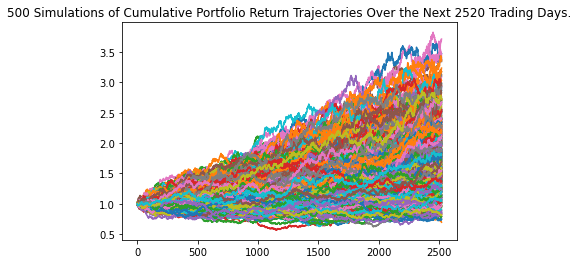

In [226]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()
line_plot.get_figure().savefig("500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days")
# YOUR CODE HERE!

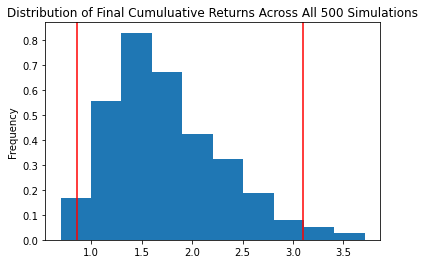

In [227]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()
dist_plot.get_figure().savefig("MC_tenyear_dist_plot.png",bbox_inches="tight")
# YOUR CODE HERE!

In [228]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.749034
std               0.558622
min               0.696328
25%               1.353042
50%               1.659709
75%               2.097553
max               3.712207
95% CI Lower      0.860628
95% CI Upper      3.101996
Name: 2520, dtype: float64


In [229]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten= round(tbl[8]* initial_investment, 2)
ci_upper_ten= round(tbl[9]* initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $49299.63 and $121377.92
